<html>
    <head>
        <title>Surviving the Titanic: A Machine Learning Approach to Predicting Passenger Survival</title>
        <style>
            backgriund-color: #f2f2f2;
        </style>
    </head>
    <body>
        <h1>Surviving the Titanic: A Machine Learning Approach to Predicting Passenger Survival</h1>
        <h2>Table of Contents</h2>
        <ol>
            <a href="#section1"><li>Importing libraries and loading the dataset</li></a>
            <a href="#section2"><li>Exploring the dataset</li></a>
            <a href="#section3"><li>Data cleaning</li></a>
            <a href="#section4"><li>Exploratory data analysis</li></a>
            <ol>
                <a href="#sub_section1"><li type="i">Univariate analysis</li></a>
                <a href="#sub_section2"><li type="i">Bivariate analysis</li></a>
            </ol>        
    </body>
</html>

<h3 id="section1">1. Importing libraries and loading the dataset</h3>
<p>Let's start by importing the necessary libraries and loading the dataset.</p>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

warnings.filterwarnings(action = 'ignore')
from ydata_profiling import ProfileReport


In [572]:
# Read the data
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
df_submission  = pd.read_csv('../input/titanic/gender_submission.csv')

<h3 id="section2">2. Exploring the dataset</h3>
<p>Let's explore the datasets:</p>

In [472]:
# Shape of the data
print('Shape of the train data: %s', df_train.shape)
print('Shape of the test data: %s', df_test.shape)
print('Shape of the submission data: %s', df_submission.shape)

Shape of the train data: %s (891, 12)
Shape of the test data: %s (418, 11)
Shape of the submission data: %s (418, 2)


In [473]:
# Sample train data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [474]:
# Smaple of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [475]:
# Sample submission data
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<p>Let's explore the train dataset to get a better understanding of its structure and content:</p>

In [476]:
# Data types
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [477]:
# Summary statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [478]:
# Unique values in each column
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<h3 id="section3">3. Data cleaning</h3>
<p>Nice! We have a dataset with <b>891</b> rows and <b>12</b> columns. Let's clean the dataset by handling missing values, duplicates, irrelevant columns, and converting data types.</p>

In [615]:
# Let's create a copy of the train and test data to perform data cleaning
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [616]:
# Missing values in train data
df_train_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [617]:
# Missing values in test data
df_test_copy.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<p>We have ver high number of missing values in <b>Cabin</b> followed by <b>Age</b> and just 2 in <b>Embarked</b> column.</p>
<p>Lets impute missing values in <b>Age</b> column by median and <b>Embarked</b> column by mode.</p>

In [618]:
# Impute missing values in Age column with median
df_train_copy['Age'] = df_train_copy['Age'].fillna(df_train_copy['Age'].median())
df_test_copy['Age'] = df_test_copy['Age'].fillna(df_test_copy['Age'].median())

# Impute missing values in Embarked column with mode
df_train_copy['Embarked'] = df_train_copy['Embarked'].fillna(df_train_copy['Embarked'].mode()[0])
df_test_copy['Embarked'] = df_test_copy['Embarked'].fillna(df_test_copy['Embarked'].mode()[0])


<p>Here empty values in <b>Cabin</b> column may indicate that passenger didn't have a cabin. So we can explore further if emplty values in cabin has relation with Survived</p>

In [619]:
# Check if there is any relations between the missing values in Cabin column and Survived column
df_train_copy[df_train_copy['Cabin'].isna()]['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

<p>We can clearly see that passengers with empty values in <b>Cabin</b> column have less chance of survival. So we can impute empty values in <b>Cabin</b> column with <b>Missing</b>.</p>

In [620]:
# Impute missing values in Cabin column with 'Missing'
df_train_copy['Cabin'] = df_train_copy['Cabin'].fillna('Missing')
df_test_copy['Cabin'] = df_test_copy['Cabin'].fillna('Missing')

In [621]:
# Let see if we still have any missing values in the train data
df_train_copy.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [622]:
# Imputing missing values in Fare column with median in test data
df_test_copy['Fare'] = df_test_copy['Fare'].fillna(df_test_copy['Fare'].median())

# Let see if we still have any missing values in test data
df_test_copy.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [623]:
# Check for duplicates in train data
df_train_copy.duplicated().sum()

0

In [624]:
# Check for duplicates in test data
df_test_copy.duplicated().sum()

0

<p>No duplicates in the dataset! Let's move on to the next step.</p>

<p>Let's convert Survived, Pclass, Sex, SibSp, Parch, and Embarked to categorical variables.</p>

In [625]:
# Convert Name, Survived, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in train data
df_train_copy['Survived'] = df_train_copy['Survived'].astype('category')
df_train_copy['Pclass'] = df_train_copy['Pclass'].astype('category')
df_train_copy['Sex'] = df_train_copy['Sex'].astype('category')
df_train_copy['SibSp'] = df_train_copy['SibSp'].astype('category')
df_train_copy['Parch'] = df_train_copy['Parch'].astype('category')
df_train_copy['Embarked'] = df_train_copy['Embarked'].astype('category')
df_train_copy['Ticket'] = df_train_copy['Ticket'].astype('category')
df_train_copy['Cabin'] = df_train_copy['Cabin'].astype('category')
df_train_copy['Name'] = df_train_copy['Name'].astype('category')


In [626]:
# Convert Name, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in test data
df_test_copy['Pclass'] = df_test_copy['Pclass'].astype('category')
df_test_copy['Sex'] = df_test_copy['Sex'].astype('category')
df_test_copy['SibSp'] = df_test_copy['SibSp'].astype('category')
df_test_copy['Parch'] = df_test_copy['Parch'].astype('category')
df_test_copy['Embarked'] = df_test_copy['Embarked'].astype('category')
df_test_copy['Ticket'] = df_test_copy['Ticket'].astype('category')
df_test_copy['Cabin'] = df_test_copy['Cabin'].astype('category')
df_test_copy['Name'] = df_test_copy['Name'].astype('category')

<h3 id="section4">4. Exploratory data analysis</h3>
<p>Let's perform exploratory data analysis to extract insights from the cab trips dataset:</p>
<h4 id="sub_section1" >i. Univariate analysis</h4>
<p>We will start by exploring the distribution of the numerical and categorical variables in the dataset:</p>

In [490]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='dodgerblue')
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([_min,_max], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Creating a DataFrame for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                    'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))


In [491]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

<p>Here Survived column is our target variable. Let's explore its distribution.</p>

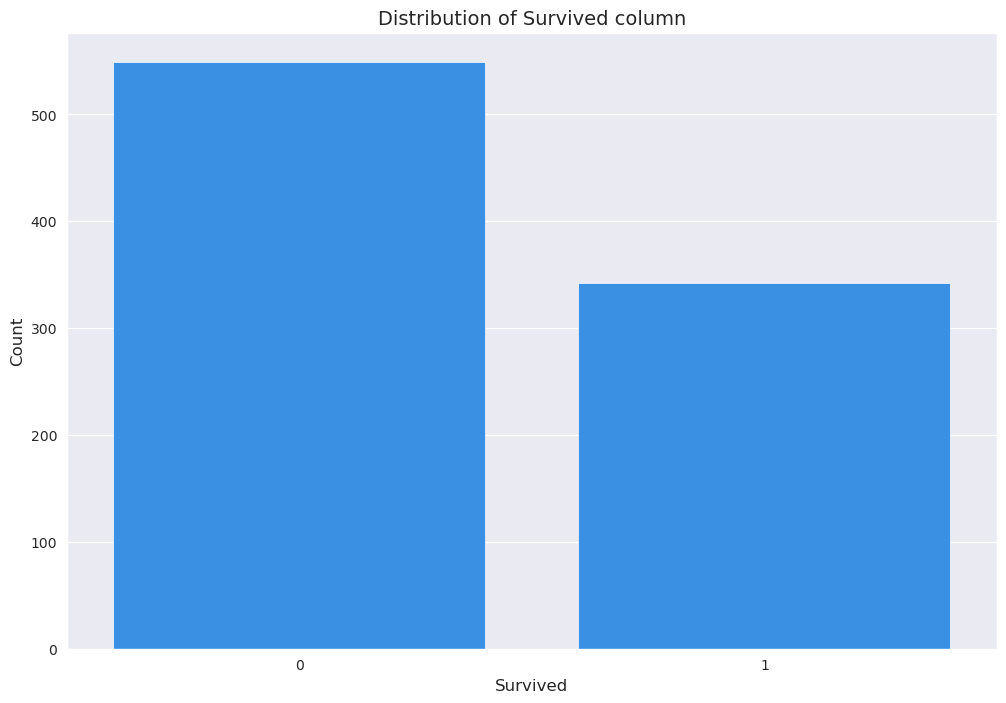

In [492]:
# Plot distribution of Survived column
plot_cat(df_train_copy, 'Survived', 'Survived', 'Count', 'Distribution of Survived column')

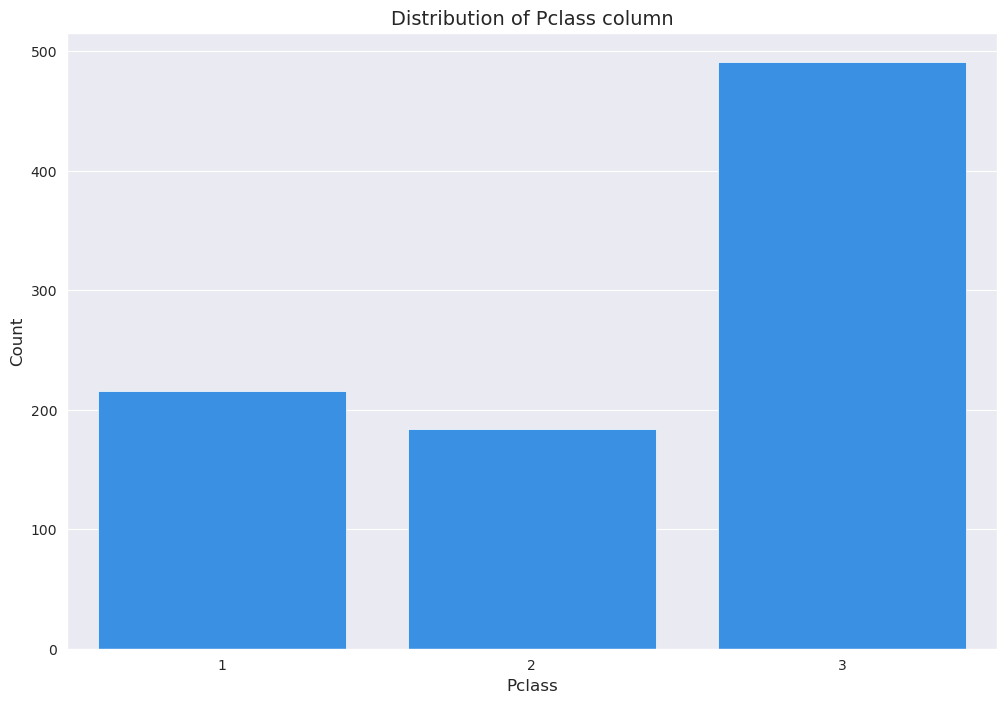

In [493]:
# Plotting distribution of Pclass column
plot_cat(df_train_copy, 'Pclass', 'Pclass', 'Count', 'Distribution of Pclass column')

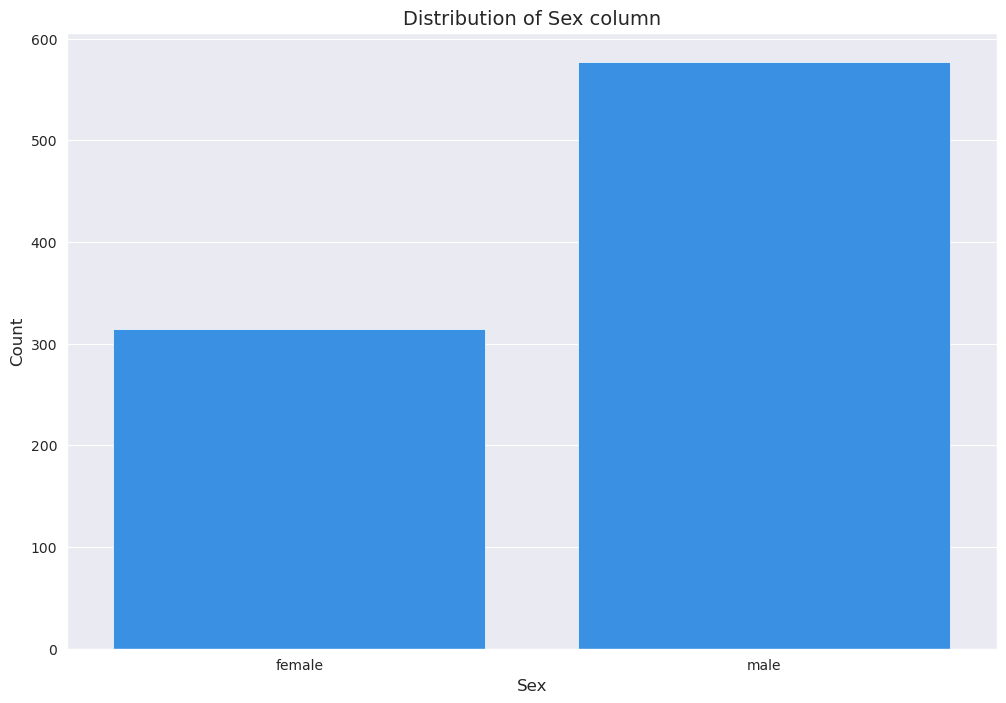

In [494]:
# Plotting distribution of Sex column
plot_cat(df_train_copy, 'Sex', 'Sex', 'Count', 'Distribution of Sex column')

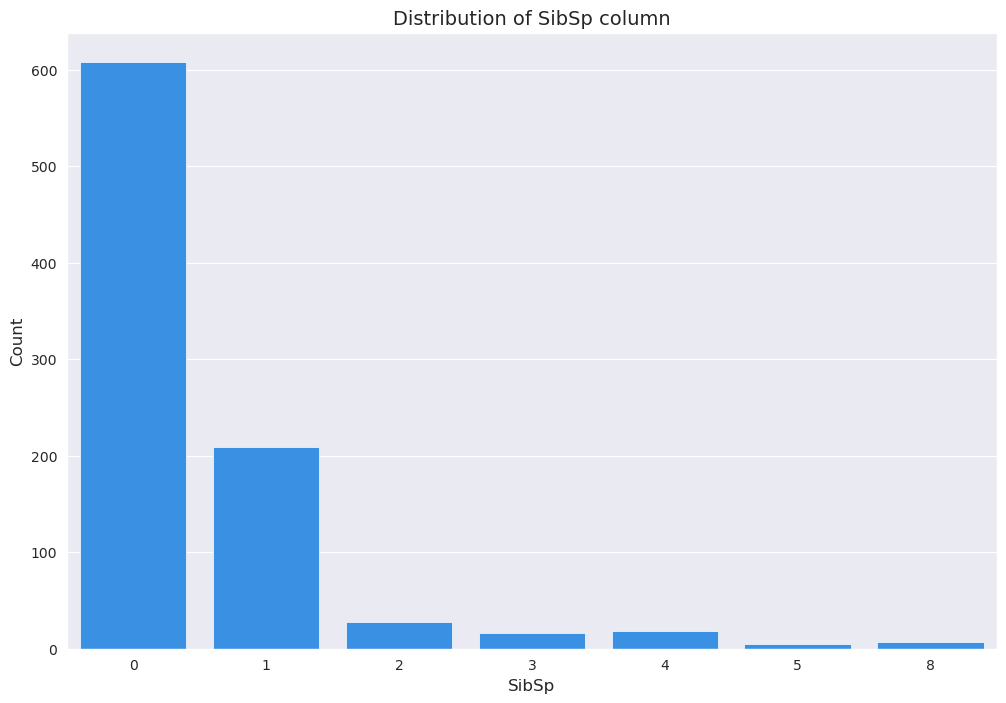

In [495]:
# Plottting distribution of SibSp column
plot_cat(df_train_copy, 'SibSp', 'SibSp', 'Count', 'Distribution of SibSp column')

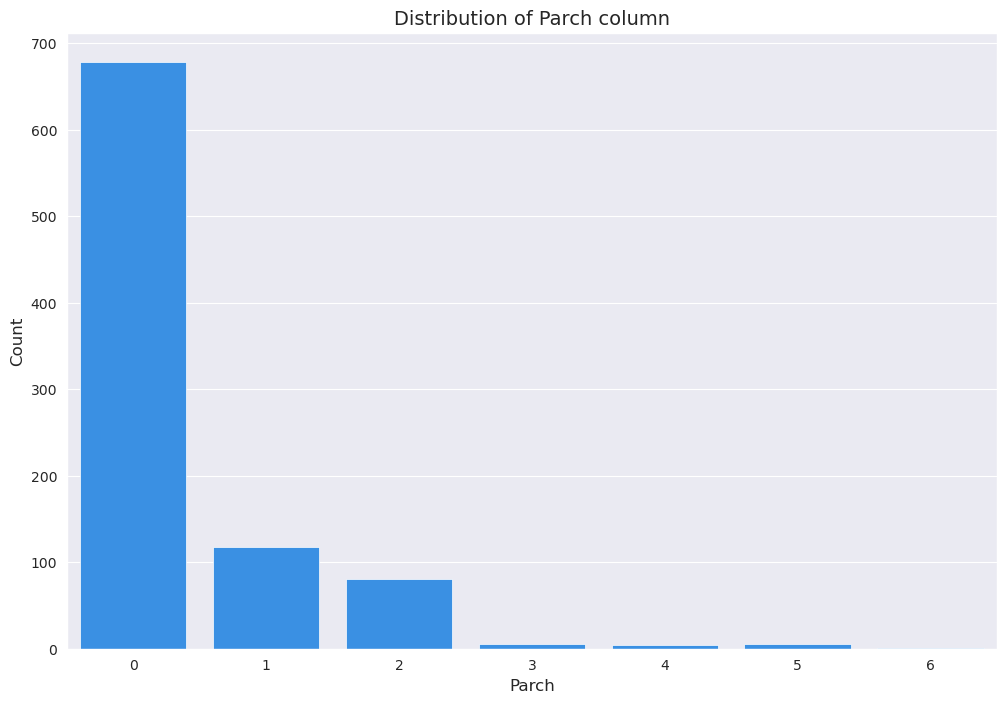

In [496]:
# Plottting distribution of Parch column
plot_cat(df_train_copy, 'Parch', 'Parch', 'Count', 'Distribution of Parch column')

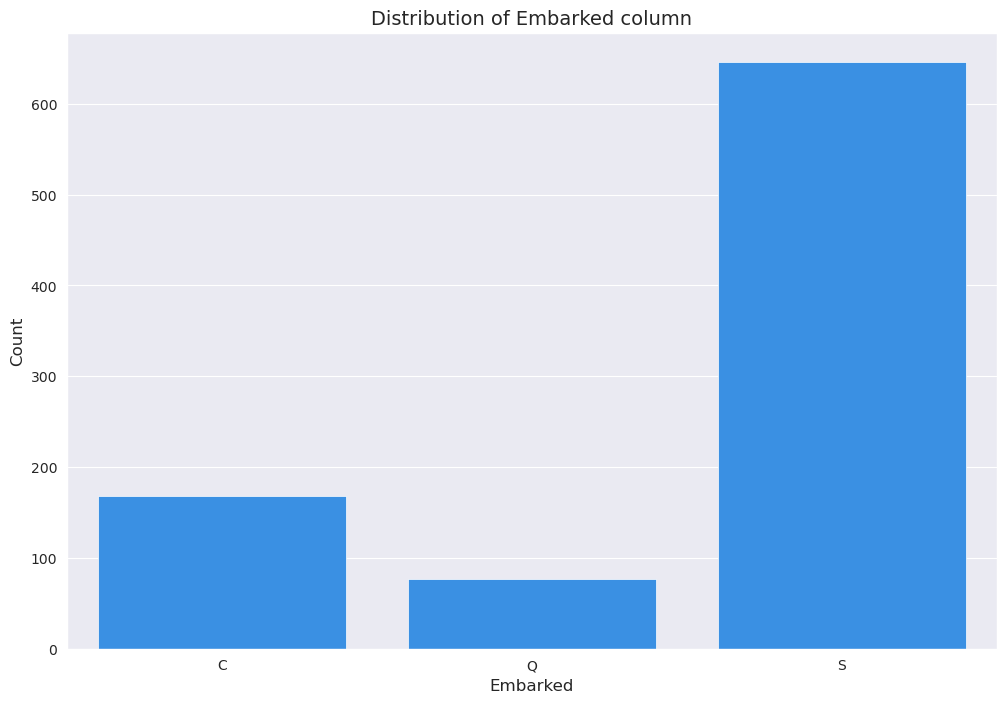

In [497]:
# Plottting distribution of Embarked column
plot_cat(df_train_copy, 'Embarked', 'Embarked', 'Count', 'Distribution of Embarked column')

<p>Lets explore the distribution of numerical variables.</p>

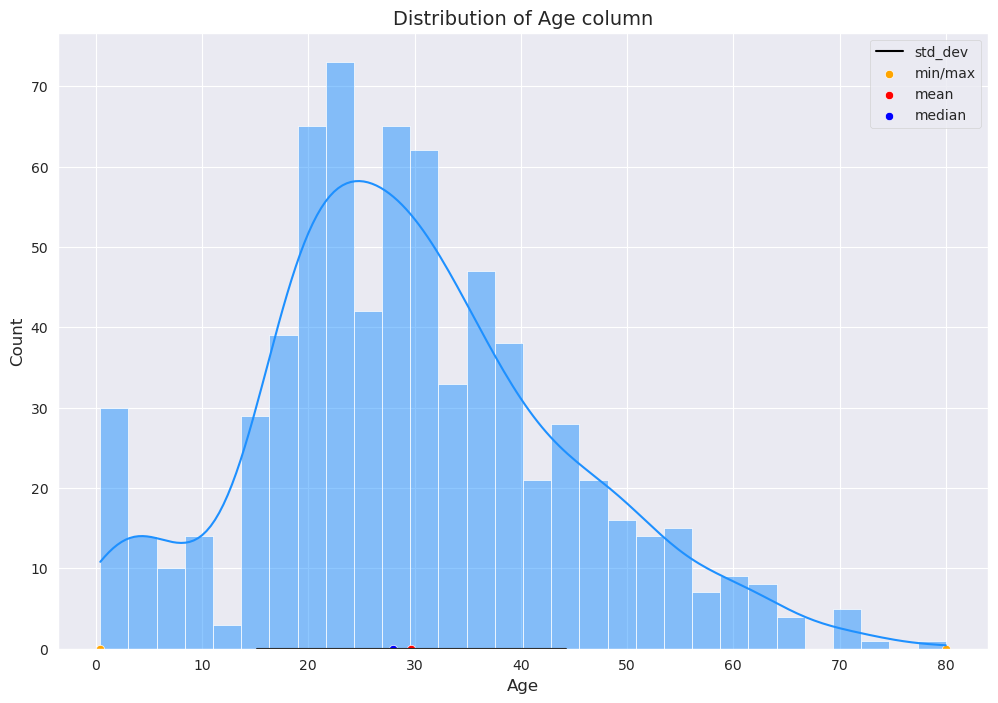

Statistics,Value
Minimum Value,0.42
Maximum Value,80
Range,79.58
Mean,29.6991
Median,28
Standard Deviation,14.5265
Skewness,0.389108
Kurtosis,0.178274


In [501]:
# Plotting distribution of Age column
plot_dist(df_train, 'Age', 'Age', 'Count', 'Distribution of Age column')

<ul>
    <li>Median Age is 28.</li>
    <li>Mean and Median Age are almost same. So Age is normally distributed.</li>
</ul>

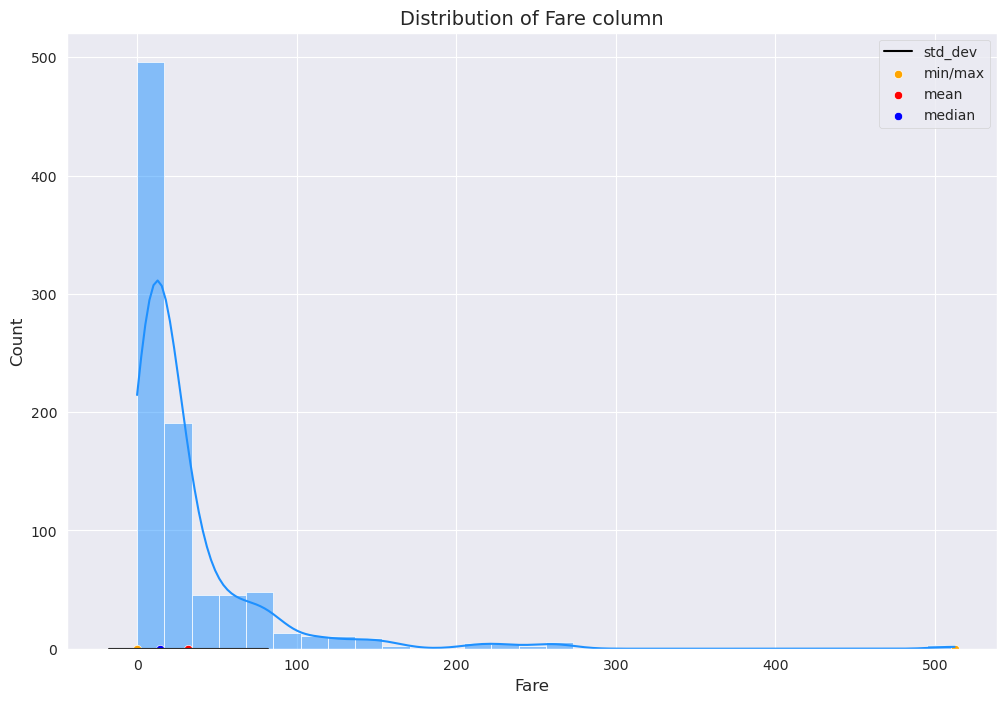

Statistics,Value
Minimum Value,0
Maximum Value,512.329
Range,512.329
Mean,32.2042
Median,14.4542
Standard Deviation,49.6934
Skewness,4.78732
Kurtosis,33.3981


In [502]:
# Let's see how Fare column is distributed
plot_dist(df_train, 'Fare', 'Fare', 'Count', 'Distribution of Fare column')

<p>Kurtosis of Fare is very high. So Fare is highly skewed.</p>
<p>Which is as expected, because certain classes will have higher fares than others and limited seats.</p>

<h4 id="sub_section2">ii. Bivariate analysis</h4>
<p>Let's explore the relationship between the trip duration and other variables in the dataset:</p>

In [513]:
# Function for plotting the distribution of numeric variables against the target variable
# Here target variable is assumed to be categorical
def plot_num_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=target, y=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

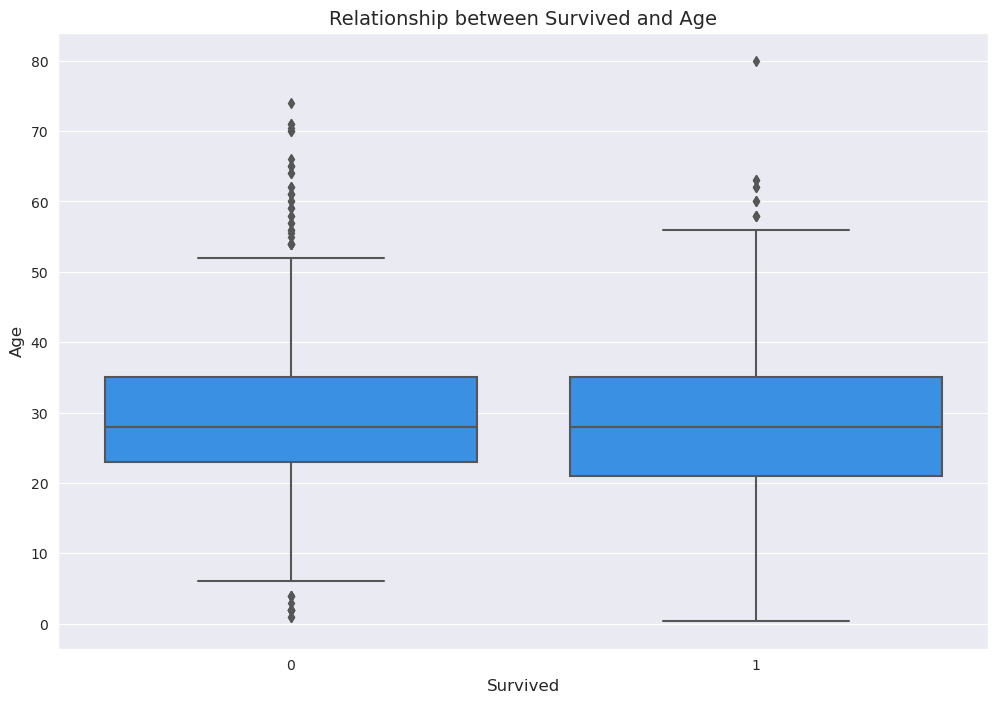

In [514]:
# Relationship between Survived and Age
plot_num_vs_target(df_train_copy, 'Age', 'Survived', 'Survived', 'Age', 'Relationship between Survived and Age')

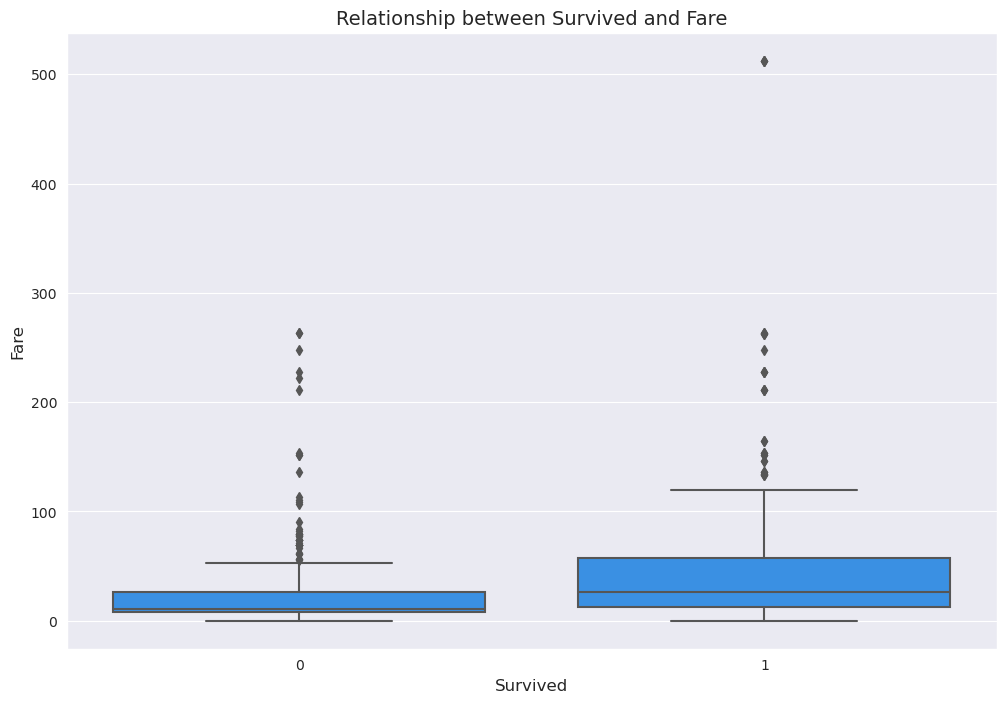

In [515]:
# Relationship between Survived and Fare
plot_num_vs_target(df_train_copy, 'Fare', 'Survived', 'Survived', 'Fare', 'Relationship between Survived and Fare')

In [518]:
# Function for plotting the distribution of categorical variables against the target variable
# Here target variable and categorical variable are assumed to be categorical
def plot_cat_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, hue=target, palette='Set1')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

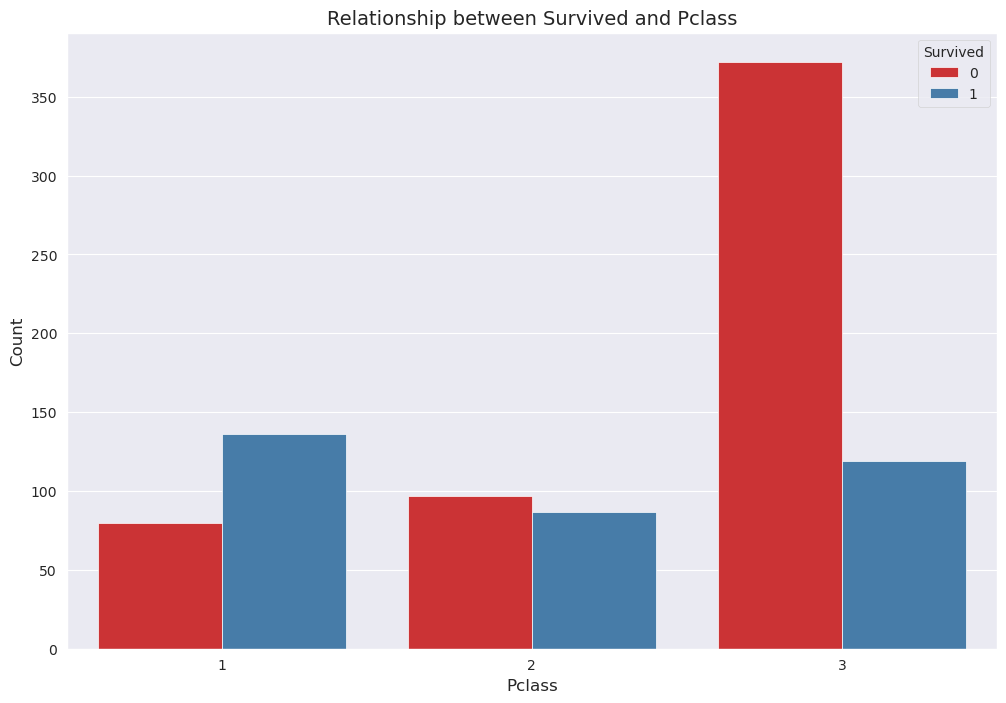

In [522]:
# Relationship between Survived and Pclass
plot_cat_vs_target(df_train_copy, 'Pclass', 'Survived', 'Pclass', 'Count', 'Relationship between Survived and Pclass')

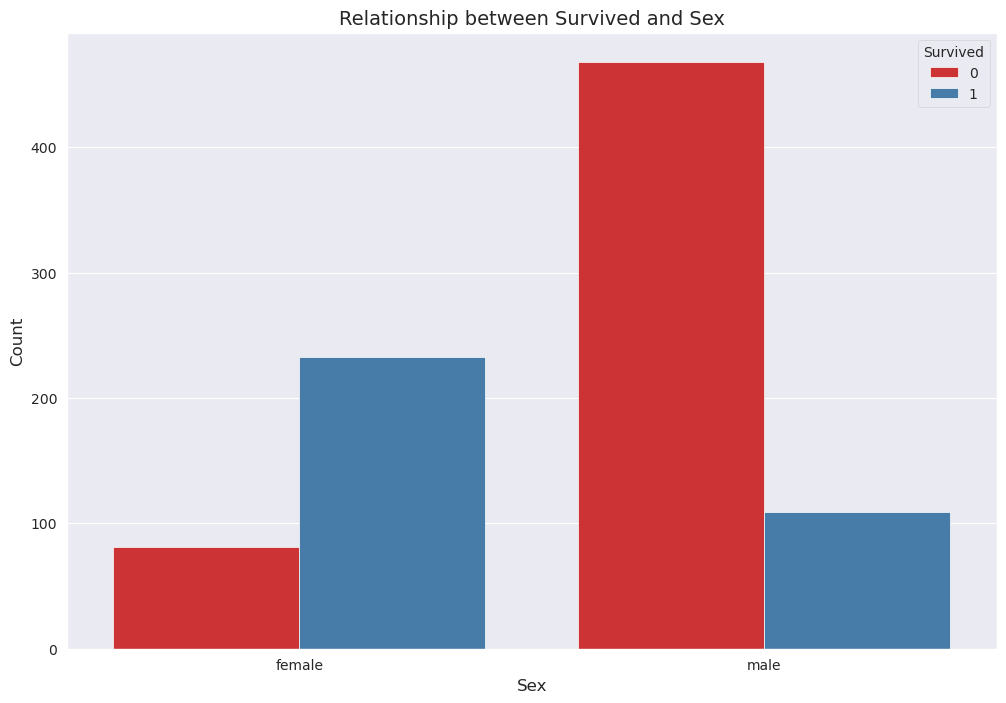

In [523]:
# Relationship between Survived and Sex
plot_cat_vs_target(df_train_copy, 'Sex', 'Survived', 'Sex', 'Count', 'Relationship between Survived and Sex')

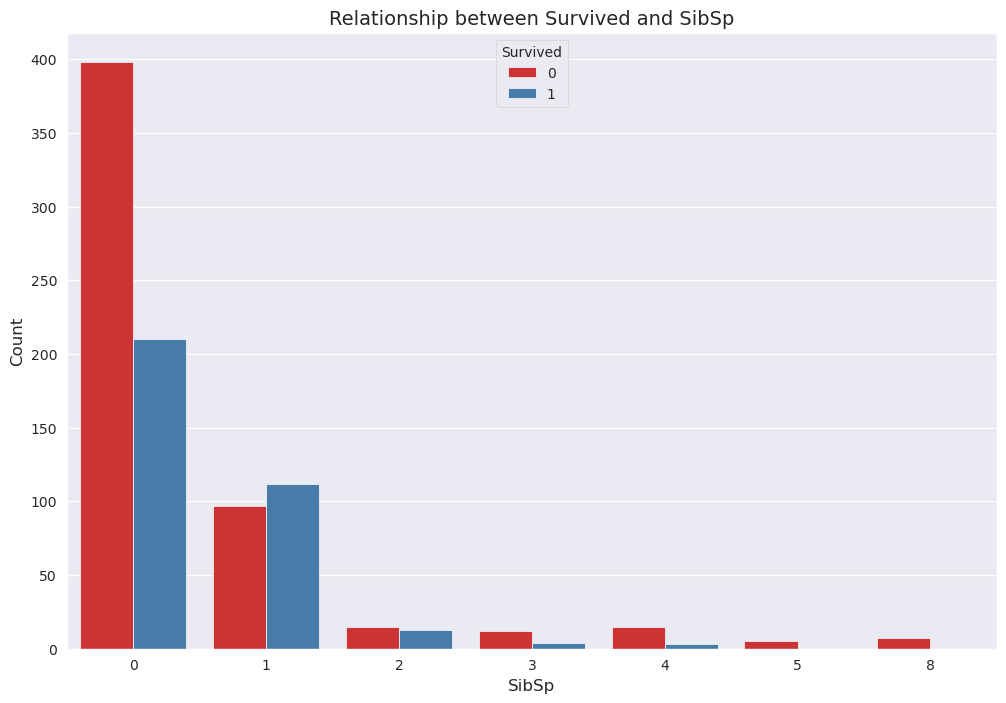

In [524]:
# Relationship between Survived and SibSp
plot_cat_vs_target(df_train_copy, 'SibSp', 'Survived', 'SibSp', 'Count', 'Relationship between Survived and SibSp')

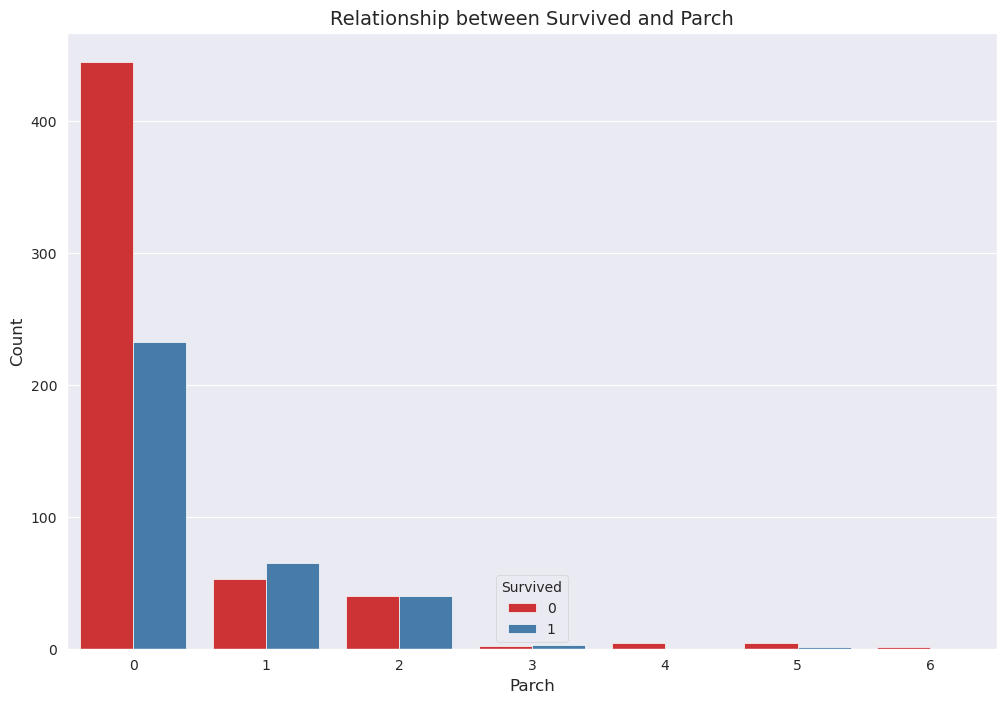

In [525]:
# Relationship between Survived and Parch
plot_cat_vs_target(df_train_copy, 'Parch', 'Survived', 'Parch', 'Count', 'Relationship between Survived and Parch')

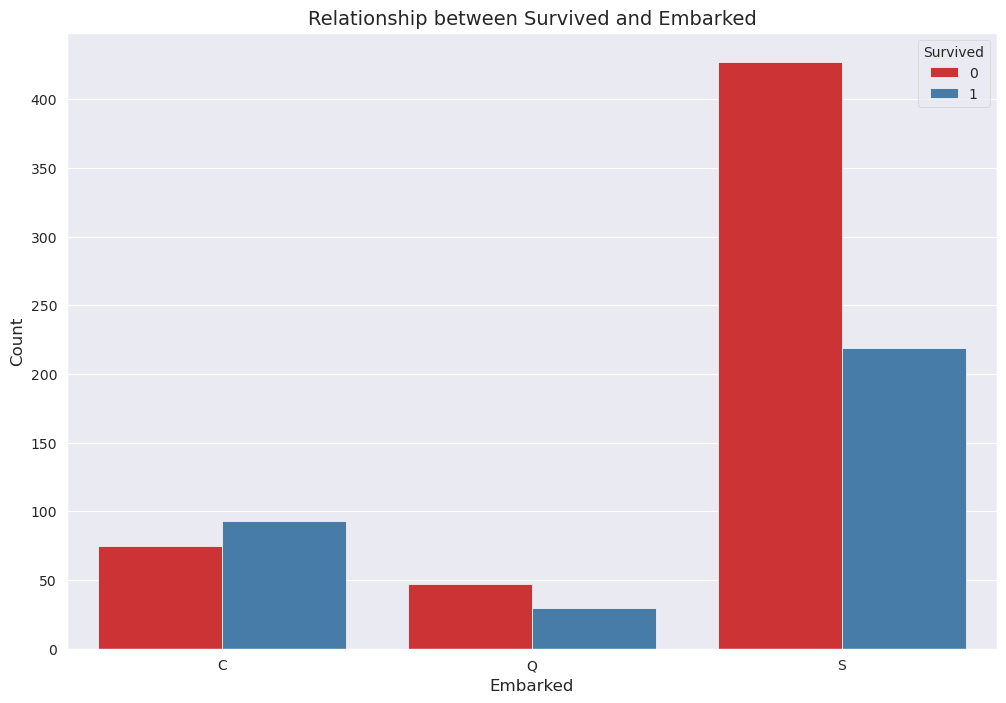

In [526]:
# Relationship between Survived and Embarked
plot_cat_vs_target(df_train_copy, 'Embarked', 'Survived', 'Embarked', 'Count', 'Relationship between Survived and Embarked')

<h3 id="section5">5. Data Preprocessing</h3>
<p>Before we use variables in our model, we need to preprocess them. We will perform the following steps:</p>
<ul>
    <li>One-hot encode categorical variables</li>
    <li>Lable encode categorical variables</li>
</ul>

In [627]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding
def encode_cat(df, col, encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

In [1005]:
# Encoding variables in the training dataset and create a new dataframe called df_train_encoded
df_train_encoded = df_train_copy.copy()
df_train_encoded = encode_cat(df_train_encoded, 'Survived', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Cabin', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Pclass', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Sex', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'SibSp', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Parch', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Embarked', 'label')

# Encoding variables in the test dataset and create a new dataframe called df_test_encoded
df_test_encoded = df_test_copy.copy()
df_test_encoded = encode_cat(df_test_encoded, 'Cabin', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Pclass', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Sex', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'SibSp', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Parch', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Embarked', 'label')

In [774]:
# Check the processed training set
df_train_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,2


In [775]:
# Check the processed test set
df_test_encoded.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,1
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,2
2,894,1,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,1
3,895,2,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,76,2
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,76,2


<p>Now that we have preprocessed the variables, let's check the correlation between them:</p>

In [776]:
# Function to plot correlation between variables
def plot_corr(df, size=10):
    corr = df.corr()
#     print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest')
    plt.show() 

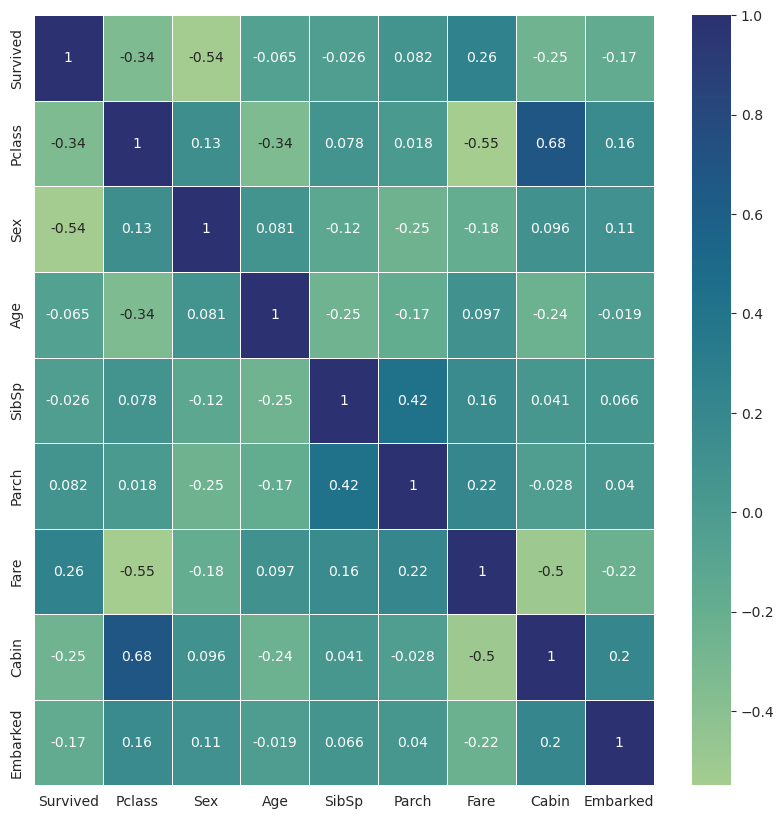

In [777]:
# Correlation between variables in the training set
plot_corr(df_train_encoded.drop(['PassengerId', 'Name', 'Ticket'], axis=1))

<p>Let's check the correlation between the variables and the target variable:</p>

In [778]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

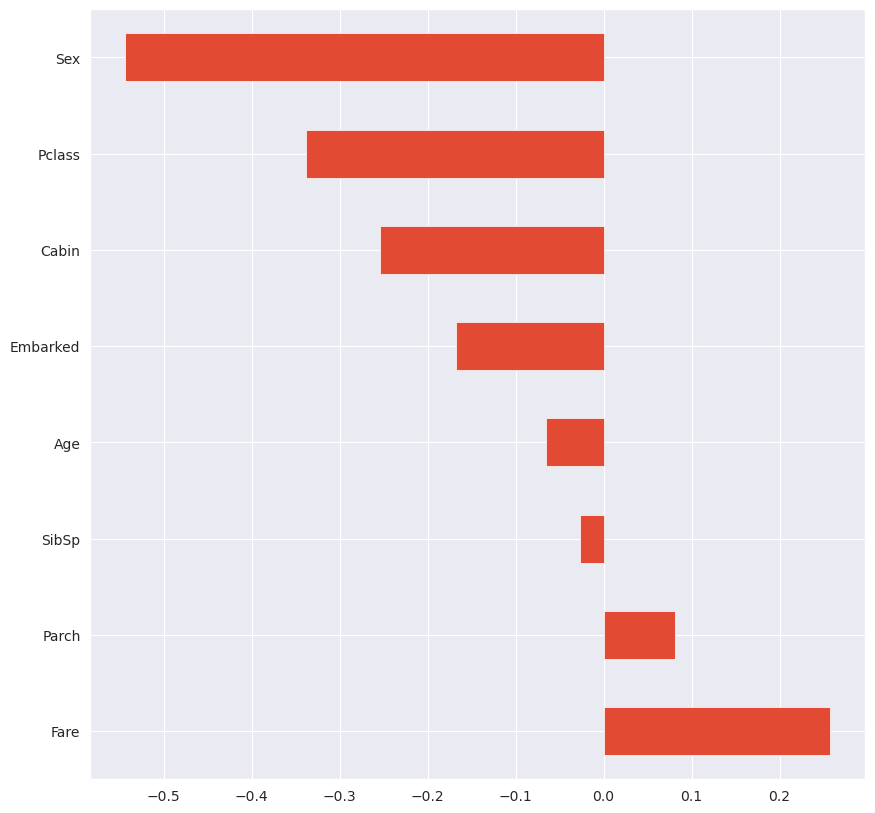

In [780]:
# Check correlation of variables with the target variable
plot_corr_target(df_train_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1), 'Survived')

<h3 id="section6">6. Model Building</h3>
<p>Let's build a model to predict the Survival of passengers on the Titanic:</p>

In [970]:
# We will first separate the target variable from the features
y = df_train_encoded['Survived']
x = df_train_encoded.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
x.shape, y.shape

((891, 8), (891,))

<p>Let's scale the features usinf scikit-learn's MinMax scaler:</p>

In [971]:
## Importing the MinMax Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [972]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [973]:
# Check data after scaling
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,0.737695,-0.565736,0.490044,-0.473674,-0.502445,0.449441,0.585954
1,-1.566107,-1.355574,0.663861,0.490044,-0.473674,0.786845,-1.373473,-1.942303
2,0.827377,-1.355574,-0.258337,-0.504555,-0.473674,-0.488854,0.449441,0.585954
3,-1.566107,-1.355574,0.433312,0.490044,-0.473674,0.420730,-2.102639,0.585954
4,0.827377,0.737695,0.433312,-0.504555,-0.473674,-0.486337,0.449441,0.585954


<p>Now, let's split the dataset into training and test sets:</p>

In [974]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 50 , stratify=y)


<h3 id="section7">7. Model Generation and Evaluation</h3>
<p>We will use different classification algorithms to build models and evaluate them using F1 score:</p>
<h4 id="sub_section1">i. KNN Classifier</h4>

In [975]:
# Import KNN classifier and metric F1 score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

<p>Let's use KNN classifier to build a model and check consistency using cross validation:</p>

In [976]:
from sklearn.model_selection import cross_val_score
# Function to cross validation for different values of k

def cross_val_knn(n_neighbors):
    '''Takes in a value of k and returns the average and standard deviation of the F1 score for 10-fold cross validation'''
    average = []
    std = []
    for i in n_neighbors:
        knn = KNN(n_neighbors=i)
        scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='f1')
        average.append(scores.mean())
        std.append(scores.std())
    return average, std

In [977]:
# Let's check the scores for a range of k values
n_neighbors = range(1,50)
mean, std = cross_val_knn(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

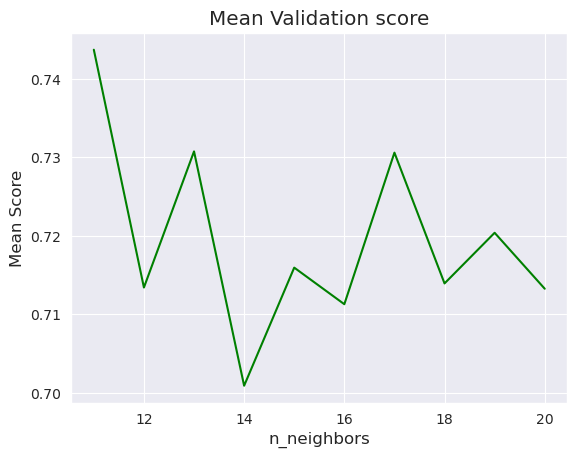

In [978]:
# Let's plot the average F1 score for each value of k
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

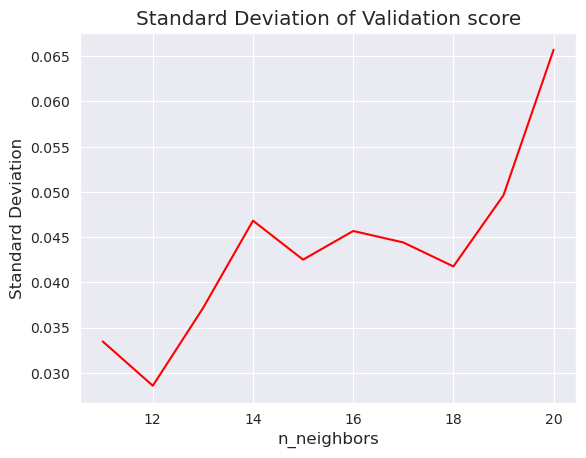

In [979]:
# Let's plot the standard deviation of the F1 score for each value of k
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'std' )
plt.xlabel('n_neighbors')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Validation score')

In [991]:
# Try fiiting the model on the test set
knn = KNN(n_neighbors=12)
knn.fit(train_x, train_y)

# Predict on the train set
score1 = knn.score(train_x, train_y)

# Predict on the test set
score2 = knn.score(test_x, test_y)

print('Train score: ', score1)
print('Test score: ', score2)


Train score:  0.8353293413173652
Test score:  0.8116591928251121


In [1008]:
train_x.shape, test_x.shape, df_test_encoded_dropped.shape

((668, 8), (223, 8), (418, 8))

In [1014]:
df_test_encoded_dropped = df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
test_scaled = scaler.fit_transform(df_test_encoded_dropped)
df_test_scaled = pd.DataFrame(test_scaled, columns= df_test_encoded_dropped.columns)
submission_predictions = knn.predict(df_test_scaled)

# train_x.shape, df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1).shape

In [1015]:
submission_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1016]:
df_submission['Survived'] = submission_predictions

In [1017]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1018]:
df_submission.to_csv('submission.csv', index=False)

<h4 id="sub_section2">ii. Logistic Regression</h4>

In [873]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [905]:
# Creating instance of Logistic Regression
log_reg = LogisticRegression()

# Fitting the model
log_reg.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_log = log_reg.predict(test_x)
k_log = f1_score(test_predict_log, test_y)

print('Test F1 Score    ', k_log )

Test F1 Score     0.6820809248554913


In [894]:
submission_predictions_log = log_reg.predict(df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [895]:
submission_predictions_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [896]:
# Combine predics with df_submission and save to csv
df_submission['Survived'] = submission_predictions_log
df_submission.to_csv('submission_log.csv', index=False)

<h4 id="sub_section3">iii. Decision Tree Classifier</h4>

In [885]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [886]:
# Creating instance of Decision Tree Classifier
clf = DecisionTreeClassifier()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_dt = clf.predict(test_x)
k_dt = f1_score(test_predict_dt, test_y)

print('Test F1 Score    ', k_dt )

Test F1 Score     0.6629213483146068


In [887]:
submission_predictions_dt = clf.predict(df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

# 

In [888]:
# Combine predictions with df_submission and save to csv
df_submission['Survived'] = submission_predictions_dt
df_submission.to_csv('submission_dt.csv', index=False)

<h4 id="sub_section4">iv. MLPClassifier</h4>

In [889]:
# Importing MLPC Classifier
from sklearn.neural_network import MLPClassifier

In [890]:
# Creating instance of MLPC Classifier
clf = MLPClassifier()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_mlpc = clf.predict(test_x)
k_mlpc = f1_score(test_predict_mlpc, test_y)

print('Test F1 Score    ', k_mlpc )

Test F1 Score     0.7195121951219512


In [891]:
submission_predictions_mlpc = clf.predict(df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [892]:
# Combine predictions with df_submission and save to csv
df_submission['Survived'] = submission_predictions_mlpc
df_submission.to_csv('submission_mlpc.csv', index=False)

<h4 id="sub_section5">v. Support Vector Machine</h4>

In [903]:
# Importing Support Vector Classifier
from sklearn.svm import SVC

In [904]:
# Creating instance of Support Vector Classifier
clf = SVC()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_svc = clf.predict(test_x)
k_svc = f1_score(test_predict_svc, test_y)

print('Test F1 Score    ', k_svc )

Test F1 Score     0.7088607594936709
